# Análise de Mercado de Games

Análise dos dados de vendas e classificação de jogos 

Dados = https://www.kaggle.com/sidtwr/videogames-sales-dataset?datasetId=189386&sortBy=voteCount

In [99]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

**Análises Iniciais**

In [100]:
dados = pd.read_csv('PS4_GamesSales.csv', encoding ='latin-1')

In [101]:
dados.head(10)

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33
7,Spider-Man (PS4),2018.0,Action-Adventure,Sony Interactive Entertainment,3.64,3.39,0.32,1.41,8.76
8,Call of Duty: Infinite Warfare,2016.0,Shooter,Activision,3.11,3.83,0.19,1.36,8.48
9,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.91,3.97,0.27,1.34,8.48


In [102]:
dados.duplicated().sum()

0

In [103]:
dados.isna().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [104]:
dados.dropna(inplace=True)

In [105]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 1030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           825 non-null    object 
 1   Year           825 non-null    float64
 2   Genre          825 non-null    object 
 3   Publisher      825 non-null    object 
 4   North America  825 non-null    float64
 5   Europe         825 non-null    float64
 6   Japan          825 non-null    float64
 7   Rest of World  825 non-null    float64
 8   Global         825 non-null    float64
dtypes: float64(6), object(3)
memory usage: 64.5+ KB


In [106]:
dados.isna().sum()

Game             0
Year             0
Genre            0
Publisher        0
North America    0
Europe           0
Japan            0
Rest of World    0
Global           0
dtype: int64

In [107]:
dados.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [108]:
dados['Genre'].unique()

array(['Action', 'Shooter', 'Action-Adventure', 'Sports', 'Role-Playing',
       'Misc', 'Platform', 'Racing', 'Fighting', 'Adventure', 'MMO',
       'Simulation', 'Music', 'Party', 'Strategy', 'Puzzle',
       'Visual Novel'], dtype=object)

**Analise da Quantidade de Jogos por gênero**

In [109]:
#Quantidade de jogos por gênero
dados_genre = dados['Genre'].value_counts()

In [110]:
dados_genre

Action              205
Role-Playing        107
Shooter              75
Adventure            71
Sports               69
Misc                 55
Racing               48
Action-Adventure     38
Platform             33
Fighting             32
Strategy             25
Simulation           21
Music                18
Puzzle               10
MMO                   8
Visual Novel          8
Party                 2
Name: Genre, dtype: int64

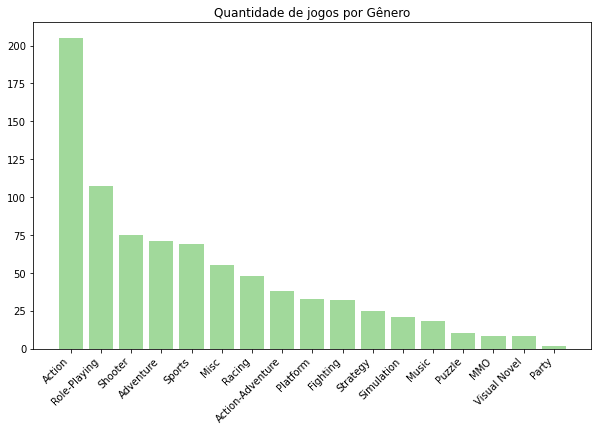

In [125]:
plt.figure(figsize =(10,6))
plt.title("Quantidade de jogos por Gênero")
plt.bar(dados_genre.index,dados_genre, color = '#a1d99b');
plt.xticks(rotation = 45, ha ='right'); #formata os nomes dos setores


Dos gêneros de jogos apresentados no banco de dados, o 'Action' se apresenta com maior quantidade de jogos produzidos para PS4



**Análise das Vendas por Ano**


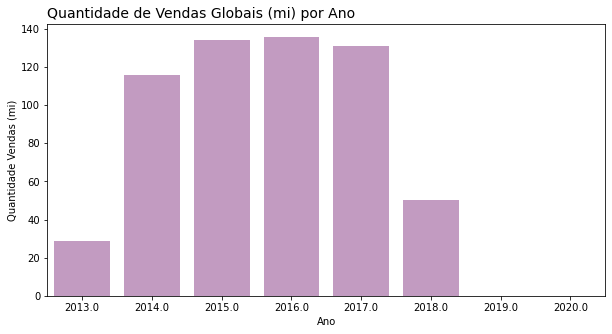

In [112]:
plt.figure( figsize=(10, 5) )
plt.title('Quantidade de Vendas Globais (mi) por Ano', loc='left', fontsize=14 )
sns.barplot( data=dados, x='Year', y='Global', ci=None, color='#c994c7', estimator=sum )
plt.ylabel('Quantidade Vendas (mi)');
plt.xlabel('Ano');

In [113]:
dados_vendas = dados.groupby(['Year']).sum()['Global'].reset_index()
dados_vendas

,Year,Global
0,2013.0,28.76
1,2014.0,115.85
2,2015.0,133.99
3,2016.0,135.72
4,2017.0,130.90
5,2018.0,50.20
6,2019.0,0.00
7,2020.0,0.00


O melhor ano em vendas no setor de Games para PS4 foi o de 2016, com cerca de 135 milhões de Dólares acumulados, seguido pelo ano de 2015. Onde a partir desse ano começa a sofrer uma queda brusca nos anos seguintes. Que pode ser melhor visualizado neste gráfico de linhas a seguir:

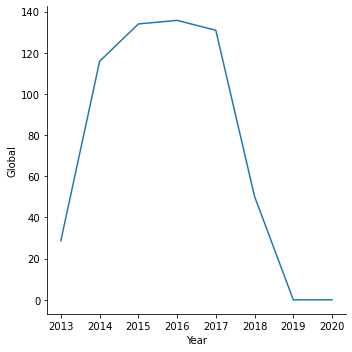

In [114]:
sns.relplot(x = "Year", y= 'Global', data = dados_vendas, kind='line');

In [115]:
dados = dados.loc[(dados['Year'] != 2019) & (dados['Year']!= 2020)]
dados

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1024,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [116]:
dados.groupby(by='Year').sum()

,North America,Europe,Japan,Rest of World,Global
Year,,,,,
2013.0,10.35,12.88,0.97,4.57,28.76
2014.0,39.80,54.12,3.58,18.29,115.85
2015.0,49.60,56.21,7.28,20.88,133.99
2016.0,47.40,57.98,9.65,20.71,135.72
2017.0,44.77,57.18,9.08,19.89,130.90
2018.0,19.65,18.70,4.13,7.69,50.20


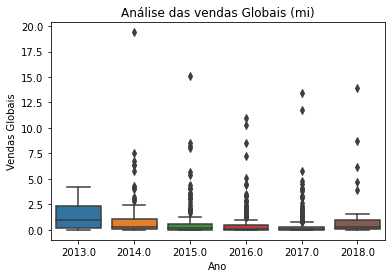

In [117]:
plt.title('Análise das vendas Globais (mi)')
sns.boxplot(x='Year', y='Global', data = dados);
plt.ylabel('Vendas Globais');
plt.xlabel('Ano');

In [118]:
dados.loc[dados['Global']>= 10]

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016.0,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016.0,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


Nesta tabela estão agrupados os dados onde as vendas globais somam igual ou maior que 10 milhões.

In [119]:
dados_publisher = dados.groupby(['Publisher']).sum().sort_values(['Global'], ascending=False)['Global'].reset_index()

In [120]:
dados_publisher.head(10)

,Publisher,Global
0,Activision,72.44
1,Ubisoft,59.16
2,Electronic Arts,54.96
3,Sony Interactive Entertainment,54.85
4,EA Sports,47.55
5,Sony Computer Entertainment,42.26
6,Rockstar Games,33.93
7,Square Enix,29.92
8,Bethesda Softworks,28.96
9,Warner Bros. Interactive Entertainment,27.83


As 10 empresas desenvolvedoras com maior faturamento global em milhões

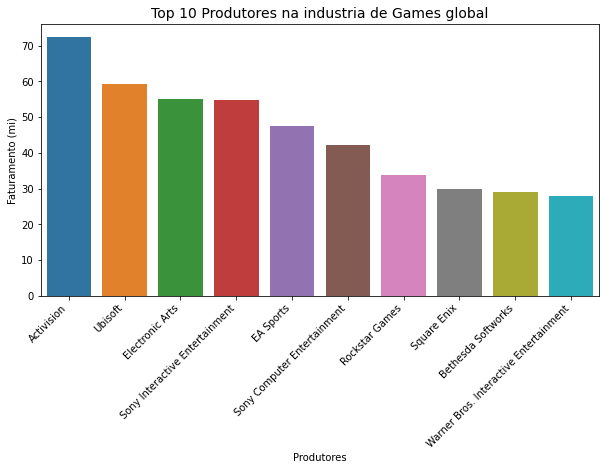

In [121]:
plt.figure( figsize=(10, 5) )
plt.title('Top 10 Produtores na industria de Games global', loc='center', fontsize=14 )
sns.barplot( data=dados_publisher.head(10), x='Publisher', y='Global')
plt.xticks( rotation=45, ha='right');
plt.ylabel('Faturamento (mi)');
plt.xlabel('Produtores');

**Análise por Continente**

In [122]:
dados_cont = dados.groupby(by=['Year']).sum().reset_index()

America = [America/Total*100 for America, Total in zip(dados_cont['North America'], dados_cont['Global'])]
Europa = [Europa/Total*100 for Europa, Total in zip(dados_cont['Europe'], dados_cont['Global'])]
Japão = [Japão/Total*100 for Japão, Total in zip(dados_cont['Japan'], dados_cont['Global'])]
Mundo = [Mundo/Total*100 for Mundo, Total in zip(dados_cont['Rest of World'], dados_cont['Global'])]

America, Europa, Japão, Mundo


([35.9874826147427,
  34.35476909797151,
  37.01768788715576,
  34.92484526967286,
  34.20168067226891,
  39.14342629482071],
 [44.78442280945759,
  46.71558049201555,
  41.95089185760131,
  42.72030651340996,
  43.68220015278838,
  37.25099601593625],
 [3.372739916550765,
  3.0902028485110056,
  5.433241286663184,
  7.110226937813145,
  6.936592818945759,
  8.227091633466136],
 [15.890125173852576,
  15.78765645230902,
  15.58325248152847,
  15.259357500736812,
  15.194805194805195,
  15.31872509960159])

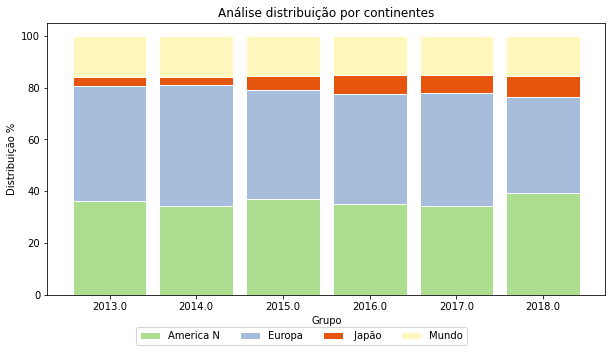

In [123]:
plt.figure( figsize=(10, 5) )

Largura_Barra = 0.85
Rotulos = dados_cont['Year']
Grupos = [0, 1, 2, 3, 4, 5]


plt.title('Análise distribuição por continentes')

plt.bar( Grupos, America, width=Largura_Barra, color='#addd8e', edgecolor='white' )


plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#a6bddb', edgecolor='white' )


plt.bar( Grupos, Japão, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#e6550d', edgecolor='white' )


plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japão) ], width=Largura_Barra, color='#fff7bc', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );

**Plotagem de todos os gráficos**


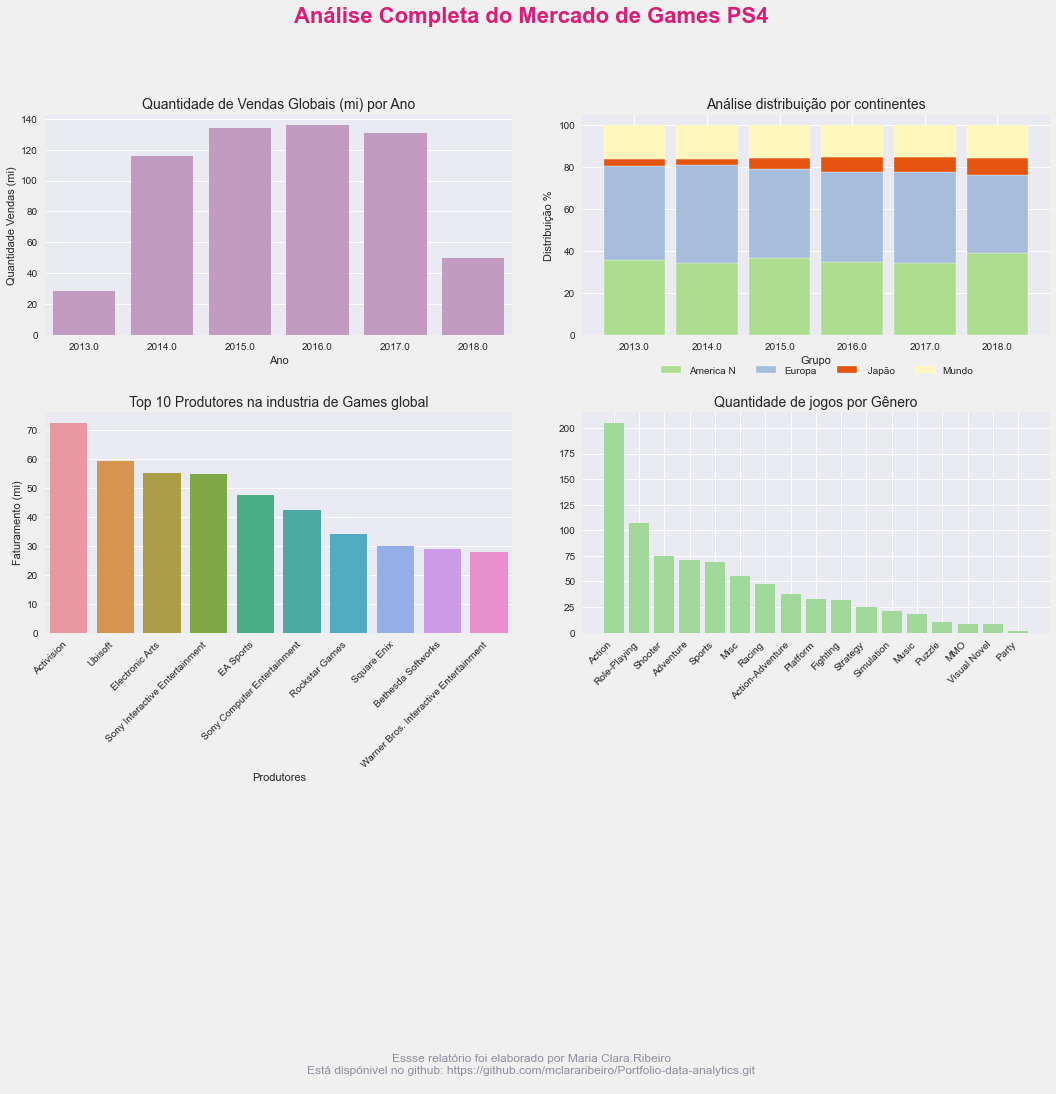

In [138]:
fig, ax = plt.subplots( figsize=(18, 15) )

Cor_Fundo = '#f0f0f0'
ax.set_facecolor( Cor_Fundo )
fig.set_facecolor( Cor_Fundo )

plt.style.use('seaborn')
plt.suptitle('Análise Completa do Mercado de Games PS4', fontsize=22, color='#dd1c77', fontweight=600 )

Linhas = 3
Colunas = 2

#Gráfico 1
plt.subplot( Linhas, Colunas, 1)
plt.title('Quantidade de Vendas Globais (mi) por Ano', loc='center', fontsize=14 )
sns.barplot( data=dados, x='Year', y='Global', ci=None, color='#c994c7', estimator=sum )
plt.ylabel('Quantidade Vendas (mi)');
plt.xlabel('Ano');

#Gráfico 2
plt.subplot( Linhas, Colunas, 2)
Largura_Barra = 0.85
Rotulos = dados_cont['Year']
Grupos = [0, 1, 2, 3, 4, 5]


plt.title('Análise distribuição por continentes', fontsize=14)

plt.bar( Grupos, America, width=Largura_Barra, color='#addd8e', edgecolor='white' )


plt.bar( Grupos, Europa, bottom=America, width=Largura_Barra, color='#a6bddb', edgecolor='white' )


plt.bar( Grupos, Japão, bottom=[ A + B for A, B in zip(America, Europa) ], width=Largura_Barra, color='#e6550d', edgecolor='white' )


plt.bar( Grupos, Mundo, bottom=[ A + B + C for A, B, C in zip(America, Europa, Japão) ], width=Largura_Barra, color='#fff7bc', edgecolor='white' )

# Labels
plt.xticks( Grupos, Rotulos )
plt.xlabel('Grupo')
plt.ylabel('Distribuição %')

# Legenda
plt.legend( ['America N', 'Europa',' Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(0.15, -0.1), ncol=4 );


#Gráfico 3
plt.subplot( Linhas, Colunas, 3)
plt.title('Top 10 Produtores na industria de Games global', loc='center', fontsize=14 )
sns.barplot( data=dados_publisher.head(10), x='Publisher', y='Global')
plt.xticks( rotation=45, ha='right');
plt.ylabel('Faturamento (mi)');
plt.xlabel('Produtores'); 

#Gráfico 4
plt.subplot( Linhas, Colunas, 4)
plt.title("Quantidade de jogos por Gênero", fontsize=14)
plt.bar(dados_genre.index,dados_genre, color = '#a1d99b');
plt.xticks(rotation = 45, ha ='right');

#Ajustar os espaçamentos das figuras
plt.subplots_adjust( hspace=0.35, wspace=0.15 )

Rodape = '''
Essse relatório foi elaborado por Maria Clara Ribeiro
Está dispónivel no github: https://github.com/mclararibeiro/Portfolio-data-analytics.git
'''

# Incluindo o rodape no relatorio
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');

